# BBC Articles Full test and Category (Kaggle Dataset)
preprocessed data - https://www.kaggle.com/yufengdev/bbc-fulltext-and-category

Raw data - http://mlg.ucd.ie/datasets/bbc.html

**Steps followed:**

> **1. Data PreProcessing (Wrangling and cleaning)**

        1.1. Build the DataFrame containing the text files and their respective labels.
        1.2. Check for any missing data
        1.3. Tokenize the data
        1.4. Data Cleaning: Remove the Stopwords, Stemming, low term frequency filterring(<3)
        1.5. Compare the cleaned data with the kaggle provided 'Preprocessed Data'
        1.6. Vectorization (Word2Vec, TfidfVectorization)
> **2. Model Building**

        2.1. Import classification Models
        2.2. Fit the data
        2.3. Evaluate the Model
        2.4. Hyperparameter Tunning
        2.5. Select the Best Model

## 1. Data Pre Processing

### 1.1. Build the DataFrame containing the text from text files

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
files_path = "00-Data/rawData/bbc-fulltext/bbc/"
categories = os.listdir(files_path)
for category in categories:
    if "readme" in category.lower():
        categories.remove(category)
categories

['business', 'entertainment', 'politics', 'sport', 'tech']

In [5]:
bbc_data = []
bbc_tags = []

In [6]:
for category in categories:
    files = os.listdir(files_path + category + "/")
    for file in files:
        oFile = open(files_path + category + "/" + file, "r", encoding="unicode_escape", errors="ignore")
        file_content = oFile.read()
        bbc_data.append(file_content)
        bbc_tags.append(category)

In [7]:
# validation
len(bbc_tags), len(bbc_data)

(2225, 2225)

In [8]:
bbc_df = pd.DataFrame(bbc_tags, columns={'category'})
bbc_df.head()

,category
0,business
1,business
2,business
3,business
4,business


In [9]:
bbc_df['text'] = bbc_data
bbc_df.head()

,category,text
0,business,Ad sales boost Time Warner profit\n\nQuarterly...
1,business,Dollar gains on Greenspan speech\n\nThe dollar...
2,business,Yukos unit buyer faces loan claim\n\nThe owner...
3,business,High fuel prices hit BA's profits\n\nBritish A...
4,business,Pernod takeover talk lifts Domecq\n\nShares in...


See first text

In [10]:
print(bbc_df['text'][0])

Ad sales boost Time Warner profit

Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.

The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.

Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AO

### 1.2. Check for any missing data

In [11]:
bbc_df.isna().sum()

category    0
text        0
dtype: int64

> There is no missing data, so we can continue with our analysis

### 1.3. Tokenize the data

In [12]:
import nltk
from nltk.tokenize import word_tokenize

In [13]:
bbc_df["text_clean"] = bbc_df["text"].apply(word_tokenize)
bbc_df.head()

,category,text,text_clean
0,business,Ad sales boost Time Warner profit\n\nQuarterly...,"[Ad, sales, boost, Time, Warner, profit, Quart..."
1,business,Dollar gains on Greenspan speech\n\nThe dollar...,"[Dollar, gains, on, Greenspan, speech, The, do..."
2,business,Yukos unit buyer faces loan claim\n\nThe owner...,"[Yukos, unit, buyer, faces, loan, claim, The, ..."
3,business,High fuel prices hit BA's profits\n\nBritish A...,"[High, fuel, prices, hit, BA, 's, profits, Bri..."
4,business,Pernod takeover talk lifts Domecq\n\nShares in...,"[Pernod, takeover, talk, lifts, Domecq, Shares..."


### 1.4. Data Cleaning: Remove the Stopwords, Stemming, low term frequency filterring(<3)

In [14]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import re

In [15]:
stop_words = set(stopwords.words('english'))
len(stop_words)

179

In [16]:
def filter_low_frequency_terms(tokens, min_words=3):
    valid_tokens = []
    fdist = FreqDist()
    for word in tokens:
        fdist[word.lower()] += 1
    valid_tokens = [item for item in tokens if fdist[item.lower()] >=min_words]
    return valid_tokens

In [17]:
def get_valid_tokens(tokenlist):
    """
    Returns valid tokens from the list of tokens after
    1. removing stop words
    2. Doing Stemming
    3. Doing Lammenting
    4. removing low term frequency filterring (f<3)
    
    tokens : pandas Series
    """
    pst = PorterStemmer()
    valid_tokens_list = tokenlist
    print("removing stop words...")
    valid_tokens_list = valid_tokens_list.apply(lambda x: [item for item in x if item not in stop_words])
    print("stop words removed...")
    
    # May sometimes be useful. Excluding for now
    
    # print("Performing low term Frequency filter")
    # valid_tokens_list = valid_tokens_list.apply(lambda x: filter_low_frequency_terms(x))
    # print("low term Frequency filtering Complete.")
    
    print("Performing Stemming...")
    valid_tokens_list = valid_tokens_list.apply(lambda x: [pst.stem(item) for item in x])
    print("Stemming Complete...")
    
    print("Removing Special charactes and number, only retaining words...")
    regex = '[a-z]+'
    valid_tokens_list = valid_tokens_list.apply(lambda x: [item for item in x if re.match(regex, item)])
    print("Process done...")
    print("*"*5 + "Operation Complete" + "*"*5)
    
    return valid_tokens_list

In [18]:
bbc_df["text_clean"] = get_valid_tokens(bbc_df["text_clean"])

removing stop words...
stop words removed...
Performing Stemming...
Stemming Complete...
Removing Special charactes and number, only retaining words...
Process done...
*****Operation Complete*****


In [19]:
bbc_df.head()

,category,text,text_clean
0,business,Ad sales boost Time Warner profit\n\nQuarterly...,"[sale, boost, time, warner, profit, quarterli,..."
1,business,Dollar gains on Greenspan speech\n\nThe dollar...,"[dollar, gain, greenspan, speech, the, dollar,..."
2,business,Yukos unit buyer faces loan claim\n\nThe owner...,"[yuko, unit, buyer, face, loan, claim, the, ow..."
3,business,High fuel prices hit BA's profits\n\nBritish A...,"[high, fuel, price, hit, profit, british, airw..."
4,business,Pernod takeover talk lifts Domecq\n\nShares in...,"[pernod, takeov, talk, lift, domecq, share, dr..."


**Save the cleaned file**

In [20]:
bbc_df.to_csv("00-Data/preprocessedData/bbc-text_myVersion.csv", index=False)

### 1.5. Compare the cleaned data with the kaggle provided 'Preprocessed Data'

In [21]:
bbc_kaggle = pd.read_csv("00-Data/preprocessedData/bbc-text.csv")
bbc_kaggle.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [22]:
bbc_kaggle['text_token'] = bbc_kaggle["text"].apply(lambda x: word_tokenize(x))
bbc_kaggle.head()

,category,text,text_token
0,tech,tv future in the hands of viewers with home th...,"[tv, future, in, the, hands, of, viewers, with..."
1,business,worldcom boss left books alone former worldc...,"[worldcom, boss, left, books, alone, former, w..."
2,sport,tigers wary of farrell gamble leicester say ...,"[tigers, wary, of, farrell, gamble, leicester,..."
3,sport,yeading face newcastle in fa cup premiership s...,"[yeading, face, newcastle, in, fa, cup, premie..."
4,entertainment,ocean s twelve raids box office ocean s twelve...,"[ocean, s, twelve, raids, box, office, ocean, ..."


In [23]:
bbc_kaggle_sorted = bbc_kaggle.sort_values(by=['category', 'text'])

In [24]:
bbc_df_sorted = bbc_df.sort_values(by=['category', 'text'])

In [25]:
bbc_kaggle_sorted.head()

,category,text,text_token
1722,business,$1m payoff for former shell boss shell is to p...,"[$, 1m, payoff, for, former, shell, boss, shel..."
1677,business,absa and barclays talks continue south africa ...,"[absa, and, barclays, talks, continue, south, ..."
1147,business,ad firm wpp s profits surge 15% uk advertising...,"[ad, firm, wpp, s, profits, surge, 15, %, uk, ..."
2020,business,ad sales boost time warner profit quarterly pr...,"[ad, sales, boost, time, warner, profit, quart..."
338,business,aids and climate top davos agenda climate chan...,"[aids, and, climate, top, davos, agenda, clima..."


In [26]:
bbc_df_sorted.head()

,category,text,text_clean
418,business,$1m payoff for former Shell boss\n\nShell is t...,"[payoff, former, shell, boss, shell, pay, ex-f..."
458,business,'Golden economic period' to end\n\nTen years o...,"[econom, period, end, ten, year, golden, econo..."
193,business,'Post-Christmas lull' in lending\n\nUK mortgag...,"[lull, lend, mortgag, lend, show, post-christm..."
202,business,'Standoff' on Deutsche's LSE bid\n\nDeutsche B...,"[deutsch, lse, bid, deutsch, boers, investor, ..."
96,business,'Strong dollar' call halts slide\n\nThe US dol...,"[dollar, call, halt, slide, the, dollar, slide..."


>It seams that, we need to do lot of transformations to compare kaggle and our dataset. Hence will take a short route for now by just comparing the first row as they appear to be of the same article.

In [27]:
print("No of tokens obtained by our method of cleaning: " , len(bbc_df['text_clean'][0]))
print("No of tokens obtained by kaggle method of cleaning: " , len(bbc_kaggle['text_token'][0]))

No of tokens obtained by our method of cleaning:  238
No of tokens obtained by kaggle method of cleaning:  773


>We can infer that our way of processing was more aggressive than the kaggle method.
Let us see in the modelling which data yields better results.

### 1.6. Vectorization (Word2Vec, TfidfVectorization)

before proceeding further, it is advisable to check the class frequencies in multiclass classification problems.

In [28]:
bbc_df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

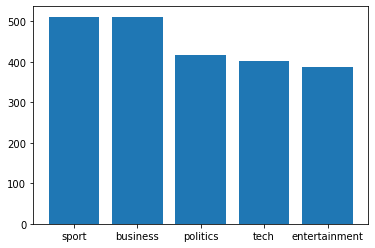

In [29]:
plt.bar(bbc_df['category'].value_counts().index, bbc_df['category'].value_counts());

> They appear to be balanced classes, so we can proceed further

In [30]:
from gensim.models import Word2Vec 

vec_model = Word2Vec(bbc_df['text_clean'])

In [31]:
w2v = dict(zip(vec_model.wv.index2word, vec_model.wv.syn0))

<ipython-input-31-66e885bd9370>:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  w2v = dict(zip(vec_model.wv.index2word, vec_model.wv.syn0))


## 2. Model Building

### 2.1. Import classification Models